In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [349]:
df = pd.read_csv("data.csv")

In [350]:
df.head()

,x,y
0,0,7
1,1,9
2,2,2
3,3,4
4,4,-1


In [351]:
X = list(df["x"])
X

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [352]:
Y = list(df['y'])
Y

[7, 9, 2, 4, -1, 0, -4, -2, -5, -3, -3, 0, 2, 1, 8]

In [353]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [354]:
Xs = np.array(X).reshape(-1,1)
Xs

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

In [355]:
Ys = np.array(Y)
Ys

array([ 7,  9,  2,  4, -1,  0, -4, -2, -5, -3, -3,  0,  2,  1,  8])

In [356]:
X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.2, random_state=42)
y_train

array([ 1,  0, -5,  2,  9,  8, -1, -2, -3,  2,  4, -4])

In [357]:
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)

X_train

array([[  1.,  13., 169.],
       [  1.,   5.,  25.],
       [  1.,   8.,  64.],
       [  1.,   2.,   4.],
       [  1.,   1.,   1.],
       [  1.,  14., 196.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.],
       [  1.,  10., 100.],
       [  1.,  12., 144.],
       [  1.,   3.,   9.],
       [  1.,   6.,  36.]])

In [358]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [359]:
poly = PolynomialFeatures(degree=2)
X_test = poly.fit_transform(X_test)

X_test

array([[  1.,   9.,  81.],
       [  1.,  11., 121.],
       [  1.,   0.,   0.]])

In [360]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_test_pred


array([-3.38196192, -1.02342991, 11.89155252])

In [361]:
mse_test = mean_squared_error(y_test, y_test_pred)

mse_test/len(y_test)

np.float64(2.791176633106483)

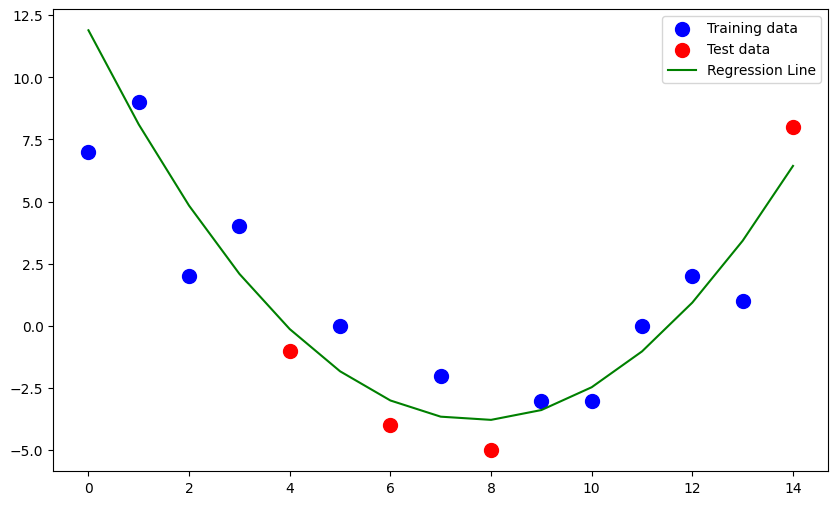

In [362]:
# Trực quan hóa dữ liệu và kết quả từ mô hình vừa xây dựng
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(Xs)

X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.22)

y_values = model.predict(X)

plt.figure(figsize=(10, 6))

# Sắp xếp tập huấn luyện theo giá trị X
sorted_train_indices = np.argsort(X_train.ravel())
X_train_sorted = X_train[sorted_train_indices]
y_train_sorted = y_train[sorted_train_indices]

# Sắp xếp tập kiểm tra theo giá trị X
sorted_test_indices = np.argsort(X_test.ravel())
X_test_sorted = X_test[sorted_test_indices]
y_test_sorted = y_test[sorted_test_indices]


plt.scatter(X_train_sorted, y_train_sorted, color='b', label="Training data", s=100)
plt.scatter(X_test_sorted, y_test_sorted, color='r', label="Test data", s=100)

plt.plot(np.sort(Xs.ravel()), y_values[np.argsort(Xs.ravel())], color='g', label='Regression Line')

# Hiển thị chú thích và đồ thị
plt.legend()
plt.show()
